In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
force_plate = pd.read_csv("/Users/ellisschwartz/Desktop/Biomechanics/force_plate.csv")
metrics = pd.read_csv("/Users/ellisschwartz/Desktop/Biomechanics/poi_metrics.csv")

In [2]:
force_plate.tail()

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time
1375069,89_5,2.8259,66.1356,-36.2259,706.7267,-27.2758,52.1204,280.2012,2.0833,2.1306,2.2694
1375070,89_5,2.8269,66.1262,-36.2258,706.7177,-27.2915,52.1178,280.2343,2.0833,2.1306,2.2694
1375071,89_5,2.8278,66.1206,-36.2257,706.7121,-27.3011,52.1162,280.2543,2.0833,2.1306,2.2694
1375072,89_5,2.8287,66.1174,-36.2257,706.7089,-27.3065,52.1153,280.2656,2.0833,2.1306,2.2694
1375073,89_5,2.8296,66.1158,-36.2258,706.7072,-27.3092,52.1148,280.2714,2.0833,2.1306,2.2694


In [3]:
metrics.tail()
nan_rows = metrics[metrics[['blast_bat_speed_mph_x', 'bat_speed_mph_contact_x','exit_velo_mph_x']].isna().any(axis=1)]
nan_rows

,session_swing,session,exit_velo_mph_x,blast_bat_speed_mph_x,bat_speed_mph_contact_x,sweet_spot_velo_mph_contact_x,sweet_spot_velo_mph_contact_y,sweet_spot_velo_mph_contact_z,bat_torso_angle_connection_x,attack_angle_contact_x,...,upper_arm_speed_mag_fm_x,upper_arm_speed_mag_fp_x,upper_arm_speed_mag_maxhss_x,upper_arm_speed_mag_seq_max_x,upper_arm_speed_mag_stride_max_velo_x,upper_arm_speed_mag_swing_max_velo_x,x_factor_hs_x,x_factor_hs_y,x_factor_hs_z,max_cog_velo_x
20,121_8,121,96.1,NaN,70.4392,70.1316,-2.7874,1.9650,160.7258,1.6679,...,130.6265,882.3683,570.2288,1141.4736,882.3683,1141.4736,-11.5693,-18.8015,0.1239,1.1171
53,164_1,164,96.5,NaN,71.0252,68.6321,12.0265,12.4275,98.8553,9.9416,...,98.2810,993.8680,791.1714,1456.2075,993.8680,1456.2075,-13.6674,-11.4704,4.0453,1.2072
98,180_1,180,89.9,NaN,62.5798,62.2422,-4.1792,-3.6540,105.1641,-3.3290,...,69.5846,687.1777,607.5103,972.1557,687.1777,972.1557,-9.7175,-16.0794,-1.7407,1.0992
122,190_3,190,94.8,NaN,62.9335,62.5696,-3.6802,3.0354,89.8305,4.4269,...,138.3750,479.2372,511.8590,1132.7952,479.2372,1132.7952,-13.6149,-21.3609,0.4856,1.0631
152,201_2,201,91.1,NaN,66.0290,64.7272,-8.9697,8.8740,103.4375,7.6685,...,96.6560,848.5282,290.9262,966.4807,848.5282,966.4807,-18.7554,-13.3584,-13.2063,1.2073
153,201_3,201,94.0,NaN,66.5943,64.9671,-4.2303,13.6096,104.6764,11.9013,...,37.1869,931.6002,322.2176,995.5788,931.6002,995.5788,-20.0626,-14.6741,-11.5725,1.2613
162,204_1,204,92.5,NaN,68.7633,68.2866,4.9851,4.3827,109.1144,3.3178,...,72.2768,990.4380,519.4586,1214.1115,990.4380,1214.1115,-8.7256,-10.1636,-9.0557,1.0630
163,204_2,204,90.2,NaN,72.0408,71.3387,5.9274,5.7719,112.3167,4.4642,...,148.5432,1080.6544,528.8588,1366.5638,1080.6544,1366.5638,-8.7057,-11.3390,-8.2123,1.0791
164,204_3,204,90.7,NaN,72.9397,68.2546,19.3803,15.8975,108.3883,12.6231,...,172.2885,1077.4025,541.5193,1354.1039,1077.4025,1354.1039,-8.8558,-11.3107,-10.0241,1.1711
205,244_5,244,90.2,NaN,66.9550,66.3984,-6.5899,4.0964,109.9744,2.9764,...,61.8863,617.9498,565.0288,1253.7190,617.9498,1253.7190,-3.1252,-19.1230,-4.9125,1.0090


In [4]:
#create a new df that combines force place data with swing identifiers, bat speed and ev
fp_merged = force_plate.merge(metrics[['session_swing','bat_speed_mph_contact_x','exit_velo_mph_x']], on='session_swing', how='left')
fp_merged['session'] = fp_merged['session_swing'].str.split('_').str[0]
fp_merged.head()

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time,bat_speed_mph_contact_x,exit_velo_mph_x,session
0,103_1,0.0000,1.1806,-9.7676,1038.6766,78.7946,3.5307,-3.8334,1.5722,1.5944,1.7528,67.9426,97.2,103
1,103_1,0.0009,1.1687,-9.7332,1038.1773,78.7929,3.5388,-3.8388,1.5722,1.5944,1.7528,67.9426,97.2,103
2,103_1,0.0019,1.1530,-9.6955,1037.6669,78.7896,3.5475,-3.8424,1.5722,1.5944,1.7528,67.9426,97.2,103
3,103_1,0.0028,1.1325,-9.6550,1037.1527,78.7843,3.5565,-3.8439,1.5722,1.5944,1.7528,67.9426,97.2,103
4,103_1,0.0037,1.1062,-9.6124,1036.6422,78.7768,3.5657,-3.8430,1.5722,1.5944,1.7528,67.9426,97.2,103


In [5]:
#creates table with max forces and bat speed to prep for correlation matrix
max_values = fp_merged.groupby('session_swing').agg({
    'rear_force_x': 'max',
    'rear_force_y': 'max',
    'rear_force_z': 'max',
    'lead_force_x': 'max',
    'lead_force_y': 'max',
    'lead_force_z': 'max',
    'bat_speed_mph_contact_x': 'first'  
}).reset_index()

In [6]:
max_values.corr()


,session_swing,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,bat_speed_mph_contact_x
session_swing,1.000000,0.064002,0.000443,0.014729,-0.161999,-0.080257,-0.055039,0.153369
rear_force_x,0.064002,1.000000,0.111971,0.444375,0.147433,0.216294,0.186991,0.188018
rear_force_y,0.000443,0.111971,1.000000,0.299006,0.076857,0.017896,0.118770,0.237067
rear_force_z,0.014729,0.444375,0.299006,1.000000,0.173454,0.301689,0.457557,0.427672
lead_force_x,-0.161999,0.147433,0.076857,0.173454,1.000000,0.303078,0.517127,0.267747
lead_force_y,-0.080257,0.216294,0.017896,0.301689,0.303078,1.000000,0.362749,0.206502
lead_force_z,-0.055039,0.186991,0.118770,0.457557,0.517127,0.362749,1.000000,0.385738
bat_speed_mph_contact_x,0.153369,0.188018,0.237067,0.427672,0.267747,0.206502,0.385738,1.000000


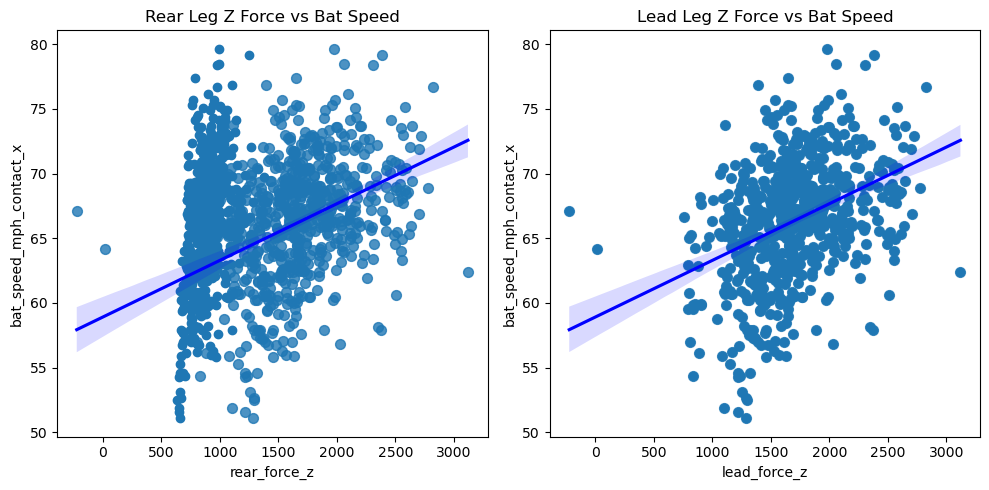

In [7]:
#checking for linearity
plt.figure(figsize=(10, 5))

# Plotting rear_force_z vs bat_speed
plt.subplot(1, 2, 1)
plt.scatter(max_values['rear_force_z'], max_values['bat_speed_mph_contact_x'])
sns.regplot(x='lead_force_z', y='bat_speed_mph_contact_x', data=max_values, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Rear Leg Z Force vs Bat Speed')
plt.xlabel('rear_force_z')
plt.ylabel('bat_speed_mph_contact_x')

# Plotting lead_force_z vs bat_speed
plt.subplot(1, 2, 2)
plt.scatter(max_values['lead_force_z'], max_values['bat_speed_mph_contact_x'])
sns.regplot(x='lead_force_z', y='bat_speed_mph_contact_x', data=max_values, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Lead Leg Z Force vs Bat Speed')
plt.xlabel('lead_force_z')
plt.ylabel('bat_speed_mph_contact_x')

plt.tight_layout()
plt.show()

In [8]:
#get one line for each swing using t=0
swing_single = (fp_merged.sort_values(["session_swing", "time"]).groupby("session_swing").first().reset_index())
swing_single.head()

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time,bat_speed_mph_contact_x,exit_velo_mph_x,session
0,103_1,0.0,1.1806,-9.7676,1038.6766,78.7946,3.5307,-3.8334,1.5722,1.5944,1.7528,67.9426,97.2,103
1,103_2,0.0,-177.4304,-12.4435,1044.8808,-27.3571,-3.4294,19.1022,1.4972,1.5250,1.6722,66.0435,88.8,103
2,103_3,0.0,-60.4669,-9.5918,1056.1217,44.0560,3.2114,-1.2239,1.5000,1.5250,1.6944,64.4315,88.9,103
3,103_4,0.0,-140.7305,-2.6496,1051.0672,7.4834,-1.0195,9.7557,1.3139,1.3361,1.4944,60.6261,83.1,103
4,103_5,0.0,-127.0215,-5.3919,1046.3686,18.9495,-1.6253,7.6101,1.5861,1.6167,1.7694,65.2323,91.6,103


In [9]:
#avg bat speed and ev for each hitter
session_avgs = (swing_single.groupby("session").agg(avg_bat_speed=("bat_speed_mph_contact_x", "mean"),avg_exit_velo=("exit_velo_mph_x", "mean")).reset_index())
bs_ev_corr = session_avgs["avg_bat_speed"].corr(session_avgs["avg_exit_velo"])
print(bs_ev_corr)
session_avgs.head()

0.83525698465297


,session,avg_bat_speed,avg_exit_velo
0,103,64.855200,89.920000
1,111,62.468175,81.837500
2,121,68.901075,94.900000
3,123,52.668037,73.712500
4,125,67.946443,90.442857


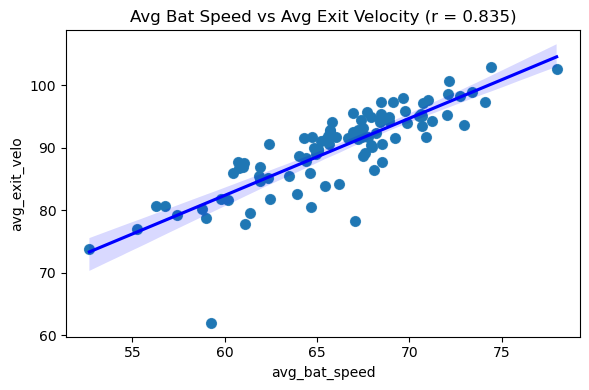

In [10]:
#plotting avg bat speed to avg ev
plt.figure(figsize=(6, 4))
plt.scatter(session_avgs["avg_bat_speed"], session_avgs["avg_exit_velo"])
plt.xlabel("Average Bat Speed")
plt.ylabel("Average Exit Velocity")
plt.title(f"Avg Bat Speed vs Avg Exit Velocity (r = {bs_ev_corr:.3f})")
sns.regplot(x='avg_bat_speed', y='avg_exit_velo', data=session_avgs, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.tight_layout()
plt.savefig("avg_bat_vs_exit_velo.png", dpi=300, bbox_inches="tight")
plt.show()


In [11]:
#top 10 hitters in avg bat speed
top_10=session_avgs.sort_values(by='avg_bat_speed',ascending=False).head(10)
print(top_10)

   session  avg_bat_speed  avg_exit_velo
65      42      77.980060     102.700000
38     282      74.451200     103.025000
12     179      74.107057      97.314286
55     358      73.401100      98.950000
8      167      72.969025      93.700000
61     383      72.769625      98.325000
41     291      72.148237     100.787500
89      68      72.096040      98.680000
97      89      72.020660      95.280000
22     204      71.212887      94.287500


In [12]:
ses_300=session_avgs[session_avgs['session']=='300']
ses_478=session_avgs[session_avgs['session']=='478']
ses_426=session_avgs[session_avgs['session']=='426']
ses_24=session_avgs[session_avgs['session']=='24']
ses_86=session_avgs[session_avgs['session']=='86']
print(ses_300)
print(ses_478)
print(ses_426)
print(ses_24)
print(ses_86)

   session  avg_bat_speed  avg_exit_velo
43     300      65.226625        91.1375
   session  avg_bat_speed  avg_exit_velo
77     478      71.029643      97.657143
   session  avg_bat_speed  avg_exit_velo
66     426      68.462975         95.375
   session  avg_bat_speed  avg_exit_velo
28      24        67.9065          94.94
   session  avg_bat_speed  avg_exit_velo
96      86       69.75812          95.86


In [17]:
#get random 10 hitters and choose 4 that weigh over 200lbs at random for control group, and create table with test group swings and control
#group swings
random_sessions={
    "302",
    "180",
    "300",
    "24",
    "478",
    "69",
    "324",
    "350",
    "426",
    "86"}
body_weight_random={
    "302": 174,
    "180": 179,
    "300": 214,
    "24": 212,
    "478": 214,
    "69": 201,
    "324": 179,
    "350": 175,
    "426": 204}


body_weight_top = {
     "42": 213,
    "282": 188,
    "179": 205,
    "358": 207,
    "167": 194,
    "383": 198,
    "291": 201,
    "68": 218,
    "89": 207,
    "204": 207,
}
top3=["282","167","383","391"]
mid3=["24","426","300","86"]
r10_graphs=fp_merged[fp_merged["session"].isin(random_sessions)]
z_302=r10_graphs[r10_graphs["session_swing"]=='302_1']
r10_graphs.head()
t10_values = top_10["session"]
t10_graphs=fp_merged[fp_merged["session"].isin(t10_values)]
    



In [18]:
#use hitters' highest ev swing for force graphs to ensure that it was not a swing with bad timing or a mishit ball
top_ev = (t10_graphs.loc[t10_graphs.groupby("session")["exit_velo_mph_x"].idxmax(),["session_swing"]])
top_ev_graphs = t10_graphs.merge(top_ev, on=["session_swing"], how="inner")
ran_ev = (r10_graphs.loc[r10_graphs.groupby("session")["exit_velo_mph_x"].idxmax(),["session_swing"]])
ran_ev_graphs = r10_graphs.merge(ran_ev, on=["session_swing"], how="inner")
top_ev_graphs.head(10)

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time,bat_speed_mph_contact_x,exit_velo_mph_x,session
0,167_3,0.0000,-91.1126,-0.8860,164.2720,-179.6627,10.3857,759.4437,0.9472,0.9944,1.1222,73.5834,97.8,167
1,167_3,0.0009,-91.0885,-1.0113,164.4888,-179.7604,10.2684,759.6557,0.9472,0.9944,1.1222,73.5834,97.8,167
2,167_3,0.0019,-91.0561,-1.1391,164.7272,-179.8540,10.1505,759.8580,0.9472,0.9944,1.1222,73.5834,97.8,167
3,167_3,0.0028,-91.0145,-1.2681,164.9873,-179.9411,10.0333,760.0443,0.9472,0.9944,1.1222,73.5834,97.8,167
4,167_3,0.0037,-90.9630,-1.3974,165.2693,-180.0191,9.9181,760.2083,0.9472,0.9944,1.1222,73.5834,97.8,167
5,167_3,0.0046,-90.9010,-1.5258,165.5728,-180.0854,9.8061,760.3438,0.9472,0.9944,1.1222,73.5834,97.8,167
6,167_3,0.0056,-90.8282,-1.6525,165.8974,-180.1379,9.6981,760.4449,0.9472,0.9944,1.1222,73.5834,97.8,167
7,167_3,0.0065,-90.7443,-1.7769,166.2423,-180.1744,9.5948,760.5060,0.9472,0.9944,1.1222,73.5834,97.8,167
8,167_3,0.0074,-90.6492,-1.8986,166.6065,-180.1932,9.4966,760.5221,0.9472,0.9944,1.1222,73.5834,97.8,167
9,167_3,0.0083,-90.5431,-2.0171,166.9888,-180.1928,9.4037,760.4889,0.9472,0.9944,1.1222,73.5834,97.8,167


In [19]:
#get front foot strike point to standardize graphs
peak_times = (
   top_ev_graphs.loc[top_ev_graphs.groupby("session_swing")["lead_force_z"].idxmax(), 
           ["session_swing", "time"]]
    .rename(columns={"time": "peak_time"})
)


top_ev_graphs = top_ev_graphs.merge(peak_times, on="session_swing", how="left")


top_ev_graphs["new_time"] = top_ev_graphs["time"] - top_ev_graphs["peak_time"]

over=top_ev_graphs[top_ev_graphs['session'].isin(top3)]


In [20]:
over.tail()

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time,bat_speed_mph_contact_x,exit_velo_mph_x,session,peak_time,new_time
11890,383_7,1.6982,119.0312,39.9429,884.6883,35.2142,-2.7397,28.2438,1.0361,1.0722,1.2028,75.2524,103.8,383,1.1037,0.5945
11891,383_7,1.6991,119.0682,39.9589,884.7024,35.1735,-2.7481,28.2135,1.0361,1.0722,1.2028,75.2524,103.8,383,1.1037,0.5954
11892,383_7,1.7000,119.0907,39.9686,884.7107,35.1485,-2.7531,28.1950,1.0361,1.0722,1.2028,75.2524,103.8,383,1.1037,0.5963
11893,383_7,1.7009,119.1033,39.9740,884.7153,35.1342,-2.7560,28.1846,1.0361,1.0722,1.2028,75.2524,103.8,383,1.1037,0.5972
11894,383_7,1.7019,119.1098,39.9768,884.7176,35.1268,-2.7574,28.1792,1.0361,1.0722,1.2028,75.2524,103.8,383,1.1037,0.5982


In [21]:
#foot strike for control group
peak_times_ran = (
    ran_ev_graphs.loc[ran_ev_graphs.groupby("session_swing")["lead_force_z"].idxmax(), 
           ["session_swing", "time"]]
    .rename(columns={"time": "peak_time"})
)


ran_ev_graphs = ran_ev_graphs.merge(peak_times_ran, on="session_swing", how="left")


ran_ev_graphs["new_time"] = ran_ev_graphs["time"] - ran_ev_graphs["peak_time"]

under=ran_ev_graphs[ran_ev_graphs['session'].isin(mid3)]


In [22]:
combined_swings = pd.concat(
    [over, under],
    axis=0,
    ignore_index=True
)

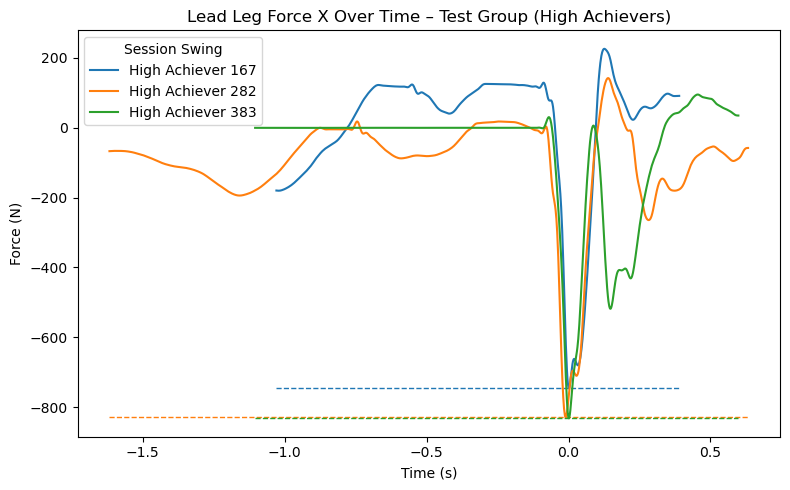

In [23]:
#graph of any direction force over time for test group, changed direction and lead/rear to get all graphs 
label_map = {
    "282_5": "High Achiever 282",
    "391_7": "High Achiever 391",
    "167_3": "High Achiever 167",
    "383_7": "High Achiever 383"
}

plt.figure(figsize=(8, 5))

for swing_id, swing_df in combined_swings.groupby("session_swing"):
    if swing_id in label_map:
        # Plot the force curve and capture the line
        line, = plt.plot(
            swing_df["new_time"],
            swing_df["lead_force_x"],
            label=label_map[swing_id]
        )


        # Compute max force before contact
        min_force = swing_df["lead_force_x"].min()

        # Horizontal dashed line at pre-contact max (same color)
        plt.hlines(
            y=min_force,
            xmin=swing_df["new_time"].min(),
            xmax=swing_df["new_time"].max(),
            colors=line.get_color(),
            linestyles="dashed",
            linewidth=1
        )

plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Lead Leg Force X Over Time – Test Group (High Achievers)")
plt.legend(title="Session Swing")
plt.tight_layout()
plt.savefig("lead_x_test.png", bbox_inches="tight", dpi=300)
plt.show()


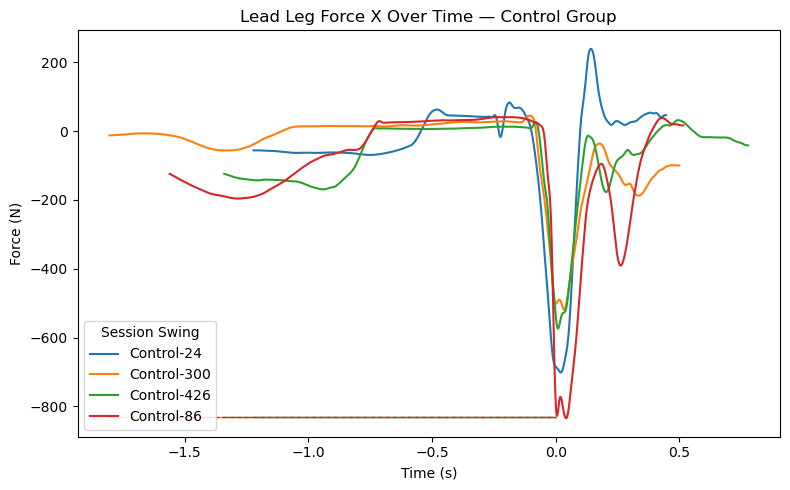

In [24]:
#force graph over time for control group
label_map = {
    "24_5": "Control-24",
    "300_5": "Control-300",
    "426_3": "Control-426",
    "86_5": "Control-86"
}

plt.figure(figsize=(8, 5))

for swing_id, swing_df in combined_swings.groupby("session_swing"):
    if swing_id in label_map:

        # Plot force curve and capture line handle
        line, = plt.plot(
            swing_df["new_time"],
            swing_df["lead_force_x"],
            label=label_map[swing_id]
        )

        # ---- PRE-CONTACT ONLY ----
        pre_contact = swing_df[swing_df["new_time"] < 0]

        if len(pre_contact) == 0:
            continue  # safety check

        # Compute max force before contact
        max_force = pre_contact["lead_force_x"].max()

        # Horizontal dashed line at pre-contact max
        plt.hlines(
            y=min_force,
            xmin=pre_contact["new_time"].min(),
            xmax=pre_contact["new_time"].max(),
            colors=line.get_color(),
            linestyles="dashed",
            linewidth=1
        )

plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Lead Leg Force X Over Time — Control Group")
plt.legend(title="Session Swing")
plt.tight_layout()
plt.savefig("lead_x_ctrl.png", bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
#another way to get force graphs with horizontal line on min force 
label_map = {
"24_5": "Control-24",
    "300_5": "Control-300",
    "426_3": "Control-426",
    "86_5":"Control-86"
    
}

plt.figure(figsize=(8, 5))

for swing_id, swing_df in combined_swings.groupby("session_swing"):

    if swing_id in label_map: 

        line, = plt.plot(
            swing_df["new_time"],
            swing_df["lead_force_y"],
            label=label_map[swing_id]
        )
        
    # Compute minimum force
        min_force = swing_df["lead_force_y"].min()
        
    # Horizontal dashed line at minimum (same color as curve)
        plt.hlines(
            y=min_force,
            xmin=swing_df["new_time"].min(),
            xmax=swing_df["new_time"].max(),
            colors=line.get_color(),
            linestyles="dashed",
            linewidth=1
        )
mid_time = (swing_df["new_time"].min() + swing_df["new_time"].max()) 


plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Lead Leg Force Y Over Time – Control Group")
plt.legend(title="Session Swing")
plt.tight_layout()
plt.savefig("lead_y_control.png", bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
#bat speed distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=unique_swing_data_sorted, x='bat_speed_mph_contact_x', color='skyblue')

# Customize the plot
plt.title("Distribution of Bat Speeds", fontsize=16)
plt.xlabel("Bat Speed", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()